Exemplo PCA aplicado a carros
(alguns frames dos videos)

In [1]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path

Gambiarra pra deixar img do mesmo tamanho (mudar diretorio)

True

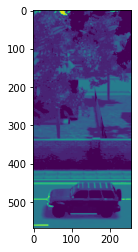

In [8]:
path = 'C:\\Users\\User\\Documents\\python_arquivos\\PCA - testes\\Screenshot_2.png'
# for i in range (0,12):
  # filename = f"frame{i}.jpg"
  # img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  # cv2.imshow('image', img)
width = 200
height = 200 
dim = (width, height)
  
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite(f"frame12.jpg", resized)
  # cv2.imwrite(f"IMAGE_NAME{i+6}.jpg", resized)
  # carros[filename] = cv2.imdecode(np.frombuffer(resized, np.uint8), cv2.IMREAD_GRAYSCALE)

In [3]:
carros = {}
with zipfile.ZipFile("framesJPG.zip") as facezip:
    for filename in facezip.namelist():
        with facezip.open(filename) as image:
            carros[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

carros

{'t1/frame1.jpg': array([[ 3,  3,  3, ..., 11, 12, 13],
        [ 3,  3,  3, ..., 10,  9,  9],
        [ 4,  4,  4, ..., 13, 12, 11],
        ...,
        [87, 87, 88, ..., 86, 87, 87],
        [87, 87, 88, ..., 87, 87, 87],
        [87, 87, 88, ..., 87, 87, 87]], dtype=uint8),
 't1/frame11.jpg': array([[81, 81, 80, ..., 15,  2,  0],
        [78, 80, 82, ...,  7,  1,  0],
        [81, 80, 79, ...,  1,  2,  0],
        ...,
        [56, 56, 56, ..., 77, 77, 77],
        [79, 79, 79, ..., 84, 84, 83],
        [85, 85, 85, ..., 84, 83, 83]], dtype=uint8),
 't1/frame2.jpg': array([[ 3,  3,  3, ..., 17, 15, 15],
        [ 3,  3,  3, ..., 17, 15, 16],
        [ 3,  3,  4, ..., 15, 14, 15],
        ...,
        [89, 89, 89, ..., 87, 87, 86],
        [89, 89, 89, ..., 87, 86, 86],
        [89, 89, 89, ..., 87, 86, 85]], dtype=uint8),
 't1/frame3.jpg': array([[ 9,  8,  6, ..., 11, 11, 11],
        [ 8,  7,  6, ..., 10, 10, 10],
        [ 8,  7,  6, ..., 10, 10, 11],
        ...,
        [89, 88

In [4]:
dimensao = list(carros.values())[0].shape
print("Dimensao das imagens:", dimensao)
 
classes = set(filename.split("/")[0] for filename in carros.keys()) # esse split ai eh descartavel
print("Numero de classes(carros):", len(classes))
print("Numero de frames:", len(carros))

Dimensao das imagens: (200, 200)
Numero de classes(carros): 2
Numero de frames: 12


In [5]:
matriz_carros = []
matriz_label = []
for key,val in carros.items():
    if key == "t1/frame11.jpg":
        continue                # vou testar com essa img
    if key == "t2/frame12.jpg":
        continue                # e com essa img
    matriz_carros.append(val.flatten())
    matriz_label.append(key.split("/")[0])
# matriz NxM = N imagens e M pixels por imagem
matriz_carros = np.array(matriz_carros)

pca = PCA().fit(matriz_carros)

# # Utilizo n componentes 
n_componentes = 3
# # vetor com as eigenfaces
auto = pca.components_[:n_componentes]

# # Mostra as 10
# fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
# for i in range(10):
#     axes[i%4][i//4].imshow(eigenfaces[i].reshape(dimensao), cmap="gray")
# print("10 (aplicado PCA)")
# plt.show()

pesos = auto @ (matriz_carros - pca.mean_).T
print("Formato da matriz de pesos:", pesos.shape)



Formato da matriz de pesos: (3, 10)


Exemplo de busca na matriz com imagem distorcida (não utilizada para geração da mesma)

Mais perto t2 distância  3838.991248


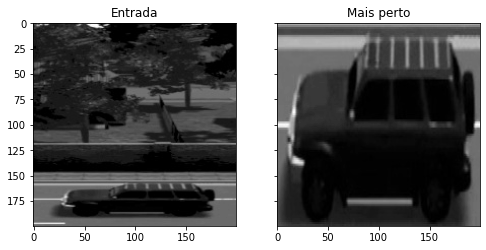

In [6]:
query = carros["t2/frame12.jpg"].reshape(1,-1)
query_weight = auto @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(pesos - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Mais perto %s distância  %f" % (matriz_label[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(dimensao), cmap="gray")
axes[0].set_title("Entrada")
axes[1].imshow(matriz_carros[best_match].reshape(dimensao), cmap="gray")
axes[1].set_title("Mais perto")
plt.show()